<a href="https://www.kaggle.com/code/mahikkaaa/carbon-cure-capstone-1?scriptVersionId=152236825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  CARBON CURE

* Mahika Agrawal - 20BAI10101
* Sneha Tiwari - 20BAI10153
* Sahil Arora - 20BAI10264
* Nikhil - 20BAI10275
* Areena Khan - 20BAI10285

# Project Description: 

**Analyzing and Predicting Carbon Emissions from Electricity Generation**

Introduction:
The goal of this project is to analyze and predict carbon emissions from electricity generation using machine learning techniques. By leveraging a comprehensive dataset on carbon emissions, we aim to gain insights into the factors influencing carbon emissions and develop a predictive model to forecast future emissions.

# Import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Time series dataset retrieving and visualization

First, in the following cells, we will retrive the monthly CO2 emissions dataset then we will visualize the dataset to decide the type of model we will use to model and analyse our time series (ts).

## Retrieving Data

In [3]:
df = pd.read_csv("../input/MER_T12_06.csv")
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
MSN             5094 non-null object
YYYYMM          5094 non-null int64
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


The dataset has 6 columns where 2 of them are integer data type and 4 objects and 5096 observations. The above dataset retriving method only retrives the dataset as a dataframe that is not as a time series dataset. To read the dataset as a time series, we have to pass special arguments to the read_csv command as given below.

In [5]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("../input/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


The arguments can be explained:
- parse_dates: This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- index_col: This is a key that forces pandas to use the date time column as index.
- date_parser: Converts an input string into datetime variable.

In [6]:
df.Unit.value_counts()      #Million Metric Tons of Carbon Dioxide    5094
df.Description.value_counts()  #9values
df.MSN.value_counts()  #9value

PCEIEUS    566
RFEIEUS    566
PAEIEUS    566
DKEIEUS    566
TXEIEUS    566
NNEIEUS    566
NWEIEUS    566
GEEIEUS    566
CLEIEUS    566
Name: MSN, dtype: int64

Total sum of CO2 emission from each energy group for every year is given as an observation that can be viewed in the NaT row. So, let us first identify and drop the non datetimeindex rows and also use ts to refere the time series dataset instead of the dataframe df. First, let us convert the index to datetime, coerce errors, and filter NaT

In [7]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

As we can see from the ts data type, the emission value is represented as an object. Let us first convert the emision value into numeric value as follows

In [9]:
#ss = ts.copy(deep=True)
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             4707 non-null object
Value           4323 non-null float64
Column_Order    4707 non-null int64
Description     4707 non-null object
Unit            4707 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


4323 observations have emissions value and therefore, we need to drop the empty rows emissions value. 

In [11]:
ts.dropna(inplace = True)

## Data Visualization

The dataset has 8 energy sources of CO2 emission. In the following cell, we will group the CO2 Emission dataset based on the type of energy source.

In [12]:
#group by products same products changing date(month)
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


The CO2 emission time series dataset is ploted to visualize the dependency of the emission in the power generation with time. 

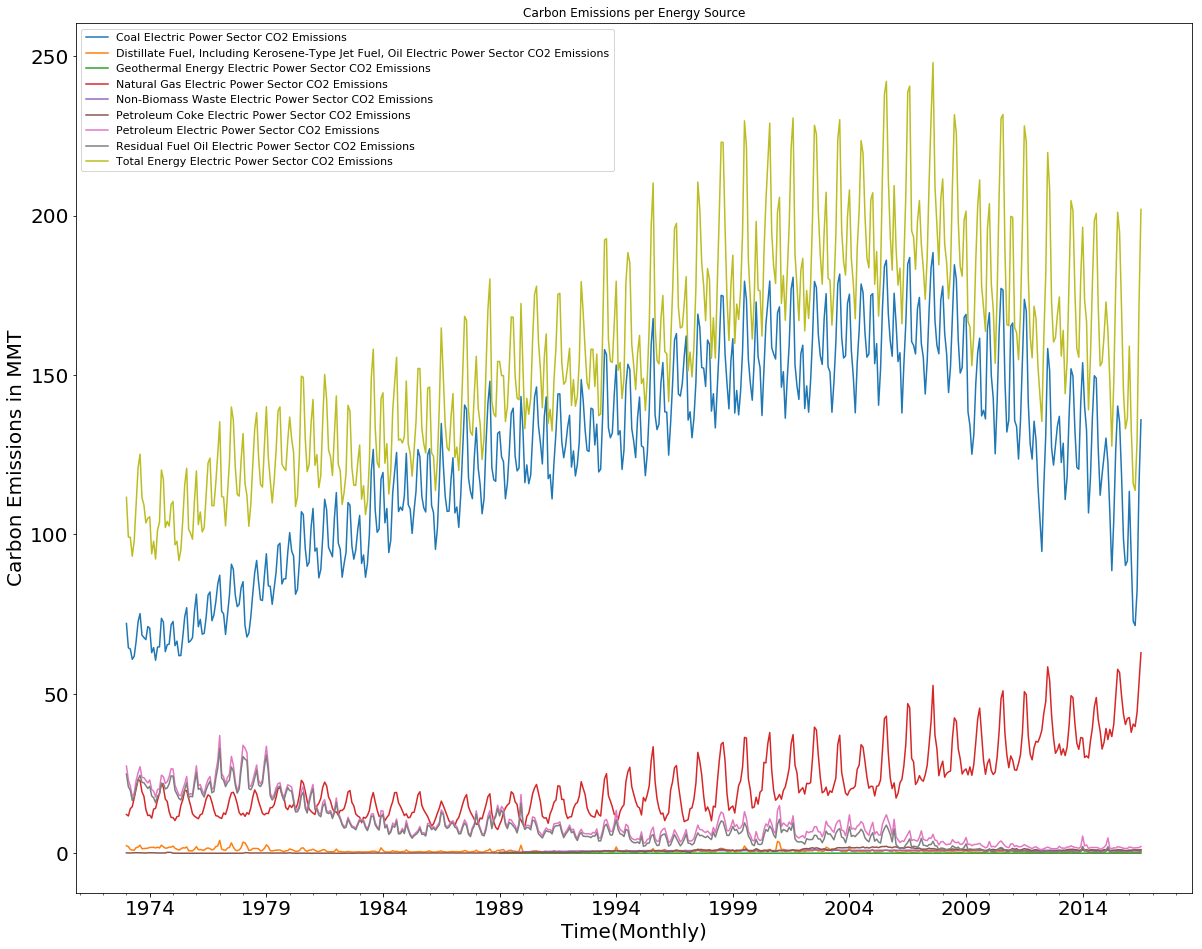

In [13]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(x = group.index, y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 11)

Individually, we can visualize the trend and seasonality effect on CO2 emission from each energy source. For example, the CO2 emission from coal shows a trend of increment from 1973 to 2006 and then declines till 2016. 

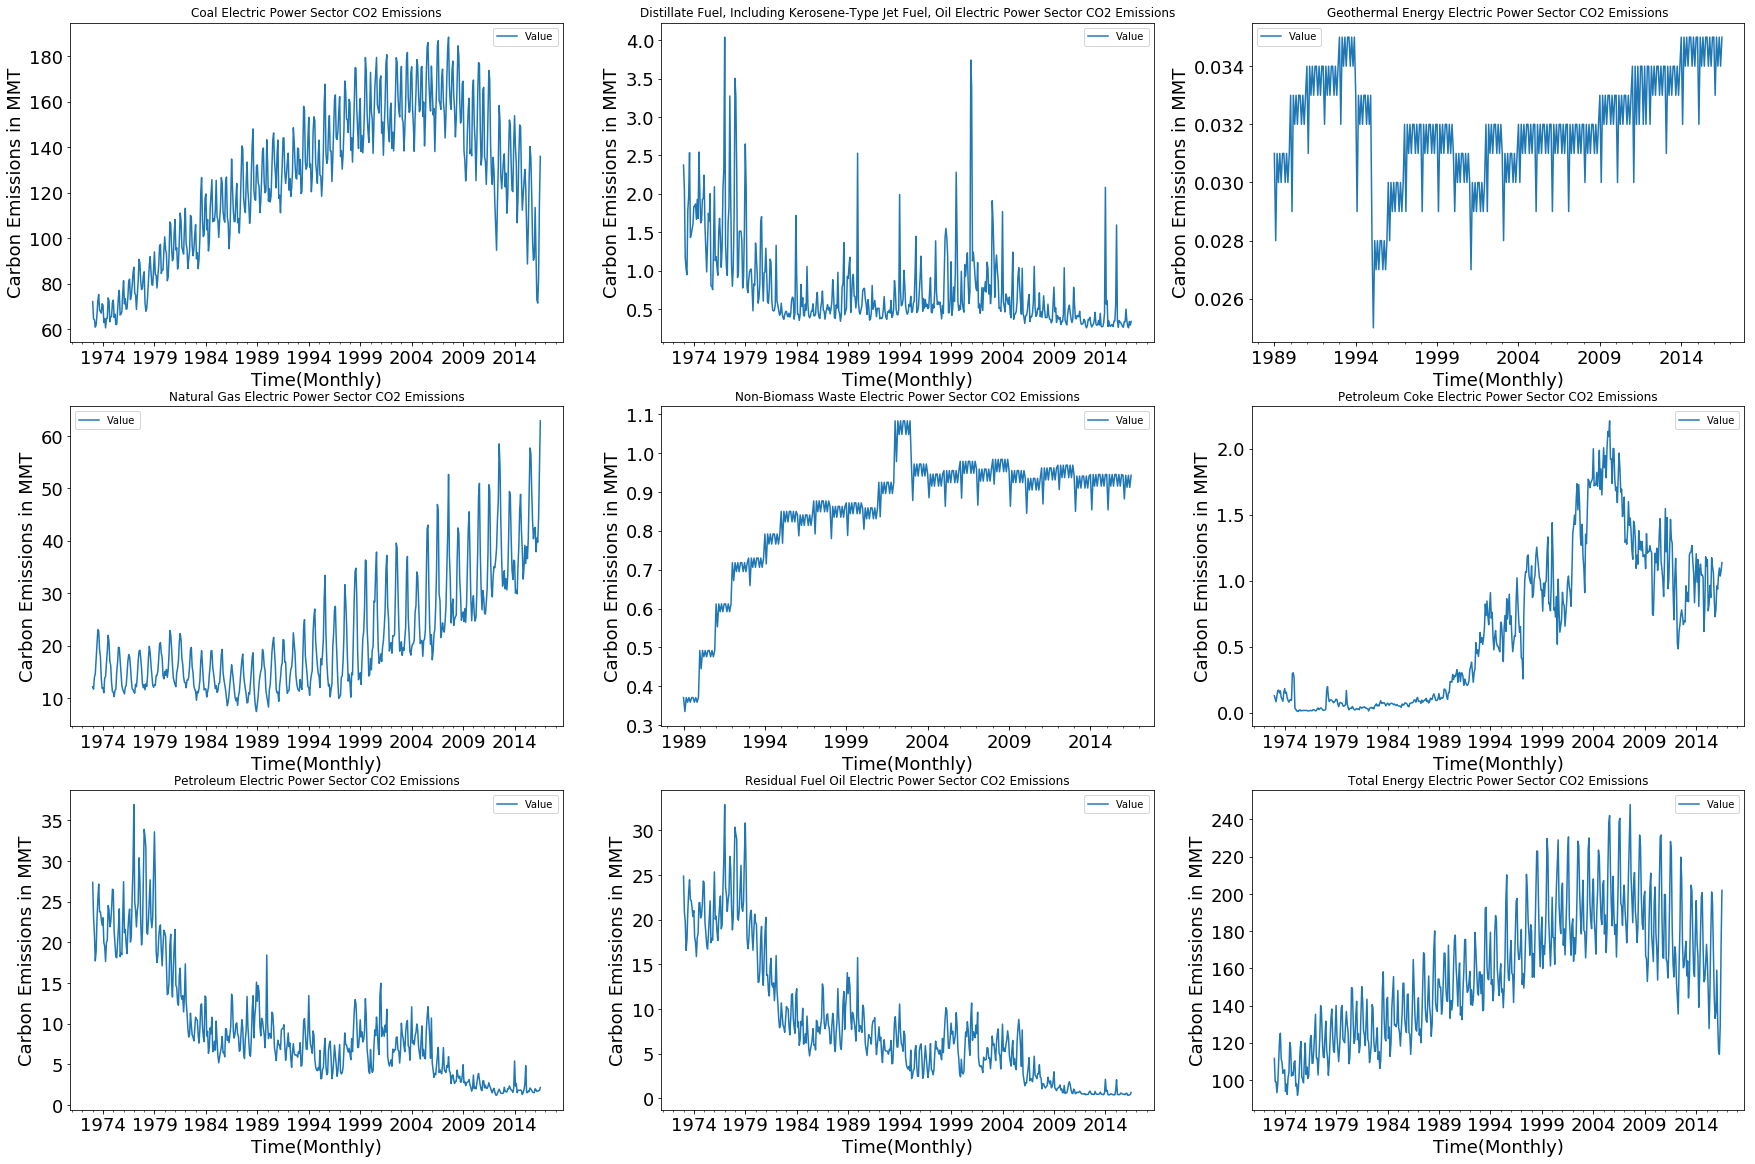

In [14]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(x = group.index, y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In recent years, the natural gas consumption has been increasing. However, the use of coal for power generation has been declining. The plots of CO2 emissions from coal and natural gas show this trend, while declining the CO2 contribution from coal, there is an increment in the contribution of CO2 emission from natural gas.

# Bar chart of CO2 Emissions per energy source

In [15]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [16]:
# I want to use shorter descriptions for the energy sources
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [17]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

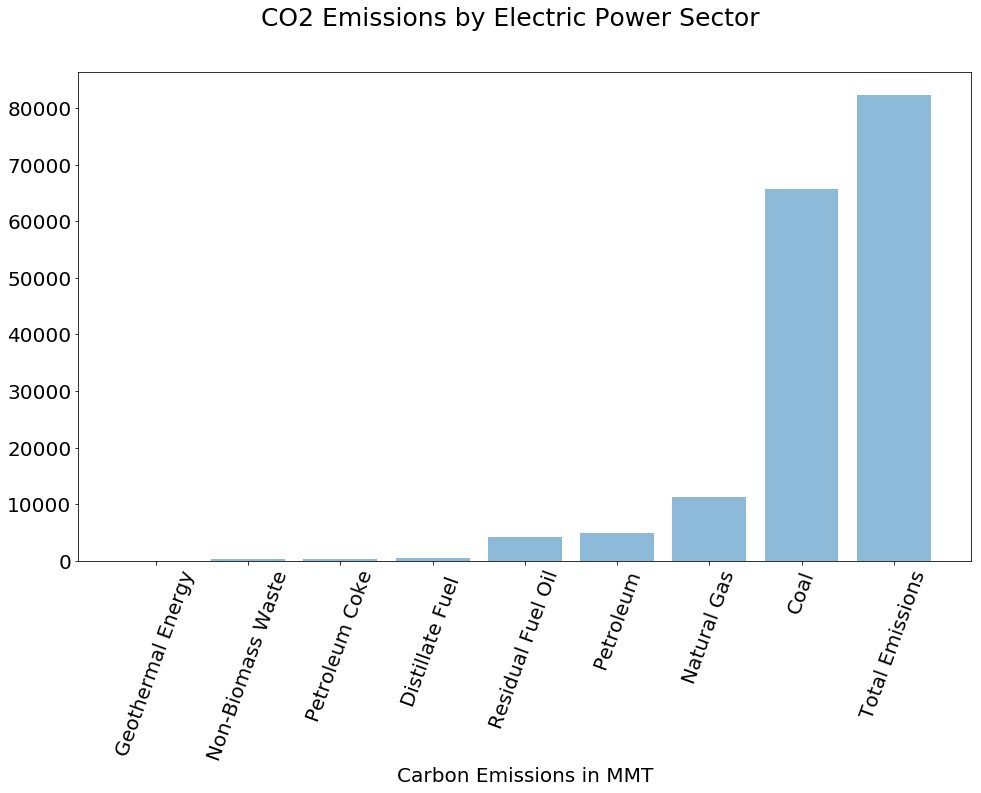

In [18]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

**From the bar chart, we can see that the contribution of coal to the total CO2 emission is significant followed by natural gas. **

In [19]:
import numpy as np
import pandas as pd

In [20]:
import tensorflow 

In [21]:
from tensorflow import keras

# Create a Sequential model
model = keras.Sequential()



In [22]:
from keras.layers import Dense

Using TensorFlow backend.


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [25]:
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("../input/MER_T12_06.csv")
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [27]:
#Preprocess the data
data = data[['YYYYMM', 'Value']] # keep only the YYYYMM and Value columns
data['YYYYMM'] = data['YYYYMM'].astype(str).str[:4].astype(int) # keep only the year
data = data.rename(columns={'YYYYMM': 'Year', 'Value': 'Value'}) # rename the columns


In [28]:
#Replace missing values with NaN
data = data.replace('Not Available', np.nan)

#Replace NaN values with the mean value
mean_value = data['Value'].astype(float).mean()
data['Value'] = data['Value'].astype(float).fillna(mean_value)


In [29]:

#Split the data into training and test sets
train_data = data[data['Year'] < 2015]
test_data = data[data['Year'] >= 2015]


In [30]:
#Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


In [31]:
# Assuming train_data and test_data are NumPy arrays

# Split the data into features and targets
x_train = train_data[:, :-1]
y_train = train_data[:, -1]
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Reshape the data to be suitable for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))


In [32]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

In [33]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Fit the model
history = model.fit(x_train, y_train, batch_size=1, epochs=5)

#Predict the test set
y_pred = model.predict(x_test)


Epoch 1/5
4914/4914 [==============================] - 34s 7ms/step - loss: 0.0091
Epoch 2/5
4914/4914 [==============================] - 32s 7ms/step - loss: 0.0091
Epoch 3/5
4914/4914 [==============================] - 32s 7ms/step - loss: 0.0091
Epoch 4/5
4914/4914 [==============================] - 32s 7ms/step - loss: 0.0091
Epoch 5/5
4914/4914 [==============================] - 32s 7ms/step - loss: 0.0091


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Assuming scaler was used to scale your data
scaler = MinMaxScaler()

# Fit the scaler on your training data
scaler.fit(y_train.reshape(-1, 1))

# Apply the inverse transform to your test and predicted data
y_test = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))))
y_pred = np.hstack((y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], 1))))


In [35]:
#Calculate the mean squared error
mse = np.mean((y_pred - y_test)**2)
print('Test MSE: %.2f' % mse)


Test MSE: 0.00
